In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
import scipy.io


In [39]:
curvature_data = np.load('/Volumes/Lenovo/neuron_ablations/curvature/N2.npy',allow_pickle=True)
head_curvature = scipy.io.loadmat('/Volumes/Lenovo/neuron_ablations/hb_dynamics/N2.mat')['N2_hb_dynamics']

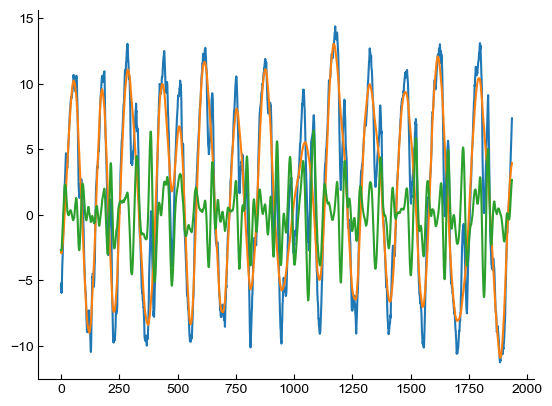

In [41]:
i = 7
head_orig = head_curvature[i,0][:,1]
head_slow_mode = head_curvature[i,0][:,3]
fast_mode = head_curvature[i,0][:,2]
plt.plot(head_orig)
plt.plot(head_slow_mode)
plt.plot(fast_mode)
plt.show()


In [42]:
def corr_lag(s1,s2,lag_range=200,zero_mean=False,norm=True):
    assert len(s1) == len(s2)
    L = len(s1)
    lags = np.arange(-lag_range,lag_range+1)
    corr = np.zeros(2*lag_range+1)
    for lag in lags:
        s1_valid = s1[max(0,lag):min(L,L+lag)]
        s2_valid = s2[max(0,-lag):min(L,L-lag)]
        if zero_mean:
            s1_valid = s1_valid - s1_valid.mean()
            s2_valid = s2_valid - s2_valid.mean()
        if norm:
            s1_valid = s1_valid / np.linalg.norm(s1_valid)
            s2_valid = s2_valid / np.linalg.norm(s2_valid)
        corr[lag+lag_range] = np.sum(s1_valid*s2_valid)
    return corr,lags

def calc_lag_corr(s1,s2,low=-50,high=0):
    corr,lags = corr_lag(s1,s2,norm=True)
    lags_neg = lags[(lags < high) & (lags > low)]
    corr_neg = corr[(lags < high) & (lags > low)]
    lag_max = lags_neg[np.argmax(corr_neg)]
    corr_max = np.max(corr_neg)
    return lag_max, corr_max
# corr,lags = corr_lag(-np.roll(head_slow_mode,24),body_curvature_interp_ls[0],norm=True)
# lag_max,corr_max = calc_lag_corr(-np.roll(head_slow_mode,24),body_curvature_interp_ls[0])
# plt.plot(lags,corr)
# plt.show()
# print(lag_max,corr_max)

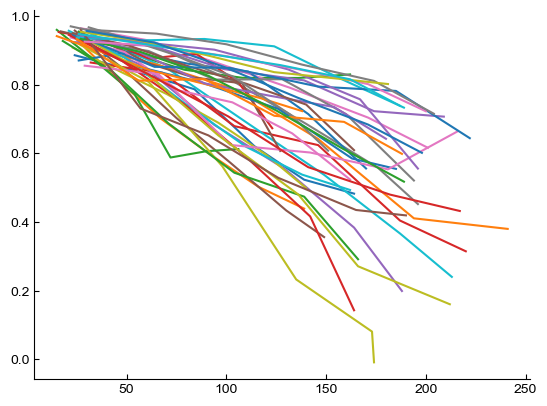

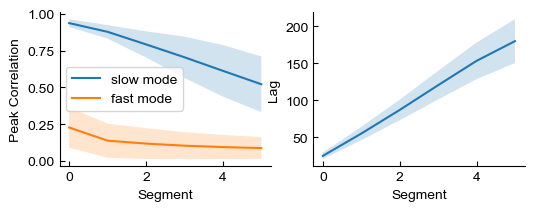

In [47]:
corr_ls_ls = []
fast_corr_ls_ls = []
lag_ls_ls = []
for i in range(len(head_curvature)):
    body_curvature_interp_ls = []
    head_slow_mode = head_curvature[i,0][:,3]
    fast_mode = head_curvature[i,0][:,2]
    if len(head_slow_mode) <700 or np.isnan(curvature_data[i,0]).any():
        continue
    for j in range(6):
        body_curv = curvature_data[i,0][15+15*j:min(15+15*(j+1),100)].mean(axis=0)
        t_orig = curvature_data[i,1][:,0]
        t_interp = np.linspace(t_orig[0],t_orig[-1],len(head_slow_mode))
        body_curv_interp = np.interp(t_interp,t_orig,body_curv)
        body_curvature_interp_ls.append(body_curv_interp)

    lag_ls = []
    corr_ls = []
    fast_corr_ls = []
    roll = 0 
    for j in range(6):
        lag,corr = calc_lag_corr(-np.roll(head_slow_mode,roll),body_curvature_interp_ls[j])
        _,fast_corr = calc_lag_corr(-np.roll(fast_mode,roll),body_curvature_interp_ls[j],low=-50,high=50)
        lag_ls.append(abs(lag) + roll)
        corr_ls.append(corr)
        fast_corr_ls.append(fast_corr)
        roll += abs(lag)
    plt.plot(lag_ls,corr_ls)
    corr_ls_ls.append(corr_ls)
    fast_corr_ls_ls.append(fast_corr_ls)
    lag_ls_ls.append(lag_ls)
plt.show()
corr_array = np.array(corr_ls_ls)
corr_mean = np.mean(corr_array,axis=0)
corr_std = np.std(corr_array,axis=0)
fast_corr_array = np.array(fast_corr_ls_ls)
fast_corr_mean = np.mean(fast_corr_array,axis=0)
fast_corr_std = np.std(fast_corr_array,axis=0)
lag_array = np.array(lag_ls_ls)
lag_mean = np.mean(lag_array,axis=0)
lag_std = np.std(lag_array,axis=0)
# plot the mean and std of the correlation
fig,ax = plt.subplots(1,2,figsize=(6,2))
ax[0].plot(np.arange(len(corr_mean)),corr_mean,label='slow mode')
ax[0].fill_between(np.arange(len(corr_mean)),corr_mean-corr_std,corr_mean+corr_std,alpha=0.2)
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('Peak Correlation')
ax[0].plot(np.arange(len(fast_corr_mean)),fast_corr_mean,label='fast mode')
ax[0].fill_between(np.arange(len(fast_corr_mean)),fast_corr_mean-fast_corr_std,fast_corr_mean+fast_corr_std,alpha=0.2)
ax[0].legend()
ax[1].plot(np.arange(len(lag_mean)),lag_mean)
ax[1].fill_between(np.arange(len(lag_mean)),lag_mean-lag_std,lag_mean+lag_std,alpha=0.2)
ax[1].set_xlabel('Segment')
ax[1].set_ylabel('Lag')

plt.savefig('Fig1/slow_mode_corr_along_body.pdf')




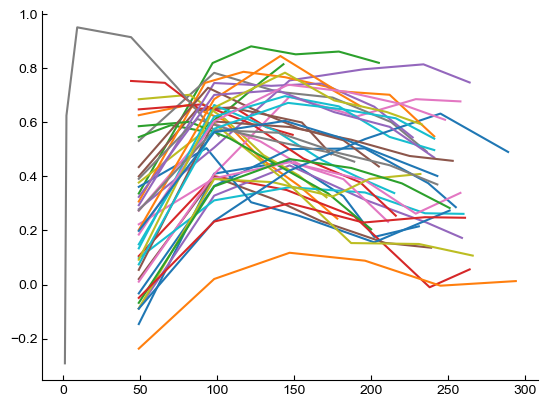

In [28]:
corr_ls_ls = []
lag_ls_ls = []
for i in range(len(head_curvature)):
    body_curvature_interp_ls = []
    head_slow_mode = head_curvature[i,0][:,4]
    if len(head_slow_mode) <700 or np.isnan(curvature_data[i,0]).any():
        continue
    for j in range(6):
        body_curv = curvature_data[i,0][15+15*j:min(15+15*(j+1),100)].mean(axis=0)
        t_orig = curvature_data[i,1][:,0]
        t_interp = np.linspace(t_orig[0],t_orig[-1],len(head_slow_mode))
        body_curv_interp = np.interp(t_interp,t_orig,body_curv)
        body_curvature_interp_ls.append(body_curv_interp)

    lag_ls = []
    corr_ls = []
    roll = 0 
    for j in range(6):
        lag,corr = calc_lag_corr(-np.roll(head_slow_mode,roll),body_curvature_interp_ls[j])
        lag_ls.append(abs(lag) + roll)
        corr_ls.append(corr)
        roll += abs(lag)
    plt.plot(lag_ls,corr_ls)
    corr_ls_ls.append(corr_ls)
    lag_ls_ls.append(lag_ls)
plt.show()
corr_array = np.array(corr_ls_ls)
corr_mean = np.mean(corr_array,axis=0)
corr_std = np.std(corr_array,axis=0)
lag_array = np.array(lag_ls_ls)
lag_mean = np.mean(lag_array,axis=0)
lag_std = np.std(lag_array,axis=0)